In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.losses import KLDivergence, sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import ReduceLROnPlateau


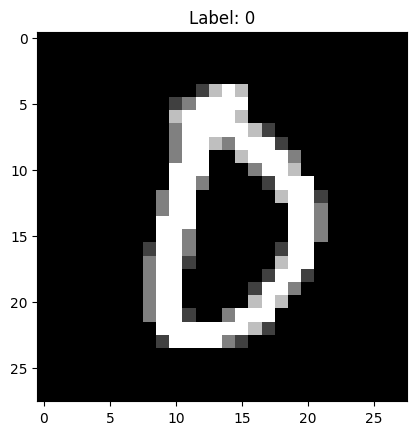

In [12]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Combine training and test datasets to get the full dataset
x_full = np.concatenate((x_train, x_test), axis=0)
y_full = np.concatenate((y_train, y_test), axis=0)


# Function to select a specified number of samples for each category
def select_samples(x, y, num_samples):
    selected_samples = []
    selected_labels = []
    for i in range(10):  # 10 categories in MNIST
        indices = np.where(y == i)[0][:num_samples]
        selected_samples.append(x[indices])
        selected_labels.append(y[indices])
    selected_samples = np.concatenate(selected_samples, axis=0)
    selected_labels = np.concatenate(selected_labels, axis=0)
    return selected_samples, selected_labels

# Select 1,000 samples for each category
x_subset, y_subset = select_samples(x_full, y_full, 1000)

# Display one random image from x_train_subset
index = np.random.randint(0, len(x_subset))
image = x_subset[index]

# Display the image
plt.imshow(image, cmap='gray')
plt.title(f"Label: {y_subset[index]}")
plt.show()



# Split the subset into training and testing sets
x_train_subset, x_test_subset, y_train_subset, y_test_subset = train_test_split(
    x_subset, y_subset, test_size=0.2, random_state=42
)



[  27  231  298  306  553  672  706  859  971  993 1018 1201 1276 1386
 1506 1532 1601 1671 1845 1939 2070 2071 2181 2222 2489 2500 2676 2680
 2842 2947 3228 3277 3325 3329 3350 3503 3582 3587 3625 3834 4027 4081
 4399 4636 4727 4756 4796 4797 4820 4947 5222 5495 5604 5647 5653 5853
 5859 5894 5935 5985 6050 6128 6273 6401 6420 6516 6538 6623 6757 6775
 7331 7376 7384 7461 7522 7532 7625 7647 7799 7848 8027 8221 8224 8242
 8385 8428 8762 8777 8854 8996 9009 9181 9292 9712 9719 9748 9804 9838
 9985 9990]
100


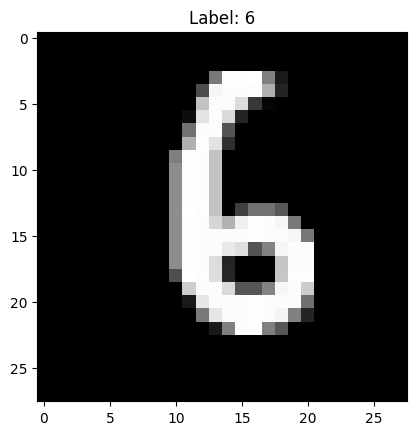

(90, 10) akfdkafdkjh (90,) (100,)


In [13]:
np.random.seed(0)
labeled_mask = np.zeros(10000, dtype=bool)
for i in range(10):
    indices = np.where(np.array(y_subset) == i)[0] # returns shuffled array of indices of each class, total 1000 data.
    np.random.shuffle(indices)
    labeled_mask[indices[:10]] = True


print(np.where(labeled_mask)[0])

labeled_dataset_to_be_trained_index = np.where(labeled_mask)[0]
unlabeled_dataset_index = np.where(~labeled_mask)[0]



labeled_dataset_to_be_trained_x = np.array([x_subset[index]  for index in labeled_dataset_to_be_trained_index])
labeled_dataset_to_be_trained_y = np.array([y_subset[index]  for index in labeled_dataset_to_be_trained_index])

unlabeled_dataset_x = np.array([x_subset[index]  for index in unlabeled_dataset_index])
# unlabeled_dataset_y = np.array([y_subset[index]  for index in unlabeled_dataset_index])

print(len(labeled_dataset_to_be_trained_y))

unique_labels = np.unique([y for y in labeled_dataset_to_be_trained_y])




# Display one random image from x_train_subset
index = np.random.randint(0, len(labeled_dataset_to_be_trained_x))
image = labeled_dataset_to_be_trained_x[index]


# Display the image
plt.imshow(image, cmap='gray')
plt.title(f"Label: {labeled_dataset_to_be_trained_y[index]}")
plt.show()



# train_labels_one_hot_y = keras.utils.to_categorical(unique_labels, num_classes=10)

# Split the subset into training and testing sets
labeled_x_train_subset,labeled_x_test_subset, labeled_y_train_subset, labeled_y_test_subset = train_test_split(
    labeled_dataset_to_be_trained_x, labeled_dataset_to_be_trained_y, test_size=0.1, random_state=42
)

train_labels_y = keras.utils.to_categorical(labeled_y_train_subset, num_classes=10)
test_labels_y = keras.utils.to_categorical(labeled_y_test_subset, num_classes=10)

print(train_labels_y.shape, 'akfdkafdkjh', labeled_y_train_subset.shape, labeled_dataset_to_be_trained_y.shape)





In [14]:
# Build the neural network model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28,1)),  # Assuming input images are 28x28
    layers.Dense(200, activation='relu'),   # Hidden layer with 200 neurons and ReLU activation
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile the model
# model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
# model.fit(labeled_x_train_subset, train_labels_y , epochs=20, batch_size=64, validation_data=(labeled_x_test_subset, test_labels_y))
model.fit(labeled_x_train_subset, train_labels_y , epochs=200, batch_size=64)

print(labeled_x_test_subset.shape)
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(labeled_x_test_subset, test_labels_y)
# _, train_acc_acc = model.evaluate(labeled_x_train_subset, train_labels_y)

print('\nTest accuracy:', test_acc)

Epoch 1/200
2/2 [==============================] - 1s 13ms/step - loss: 211.0448 - accuracy: 0.0444
Epoch 2/200
2/2 [==============================] - 0s 10ms/step - loss: 167.5184 - accuracy: 0.1333
Epoch 3/200
2/2 [==============================] - 0s 11ms/step - loss: 109.6602 - accuracy: 0.3000
Epoch 4/200
2/2 [==============================] - 0s 10ms/step - loss: 82.9648 - accuracy: 0.3556
Epoch 5/200
2/2 [==============================] - 0s 12ms/step - loss: 44.2092 - accuracy: 0.5333
Epoch 6/200
2/2 [==============================] - 0s 9ms/step - loss: 37.6659 - accuracy: 0.5444
Epoch 7/200
2/2 [==============================] - 0s 10ms/step - loss: 24.1998 - accuracy: 0.5889
Epoch 8/200
2/2 [==============================] - 0s 11ms/step - loss: 26.2756 - accuracy: 0.6889
Epoch 9/200
2/2 [==============================] - 0s 12ms/step - loss: 15.8498 - accuracy: 0.7667
Epoch 10/200
2/2 [==============================] - 0s 10ms/step - loss: 9.5554 - accuracy: 0.8333
Epoch 11

In [ ]:
model_vat = keras.Sequential([
    layers.Flatten(input_shape=(28, 28,1)),  # Assuming input images are 28x28
    layers.Dense(200, activation='relu'),   # Hidden layer with 200 neurons and ReLU activation
    layers.Dense(10, activation='softmax')

])

def logit(x, is_training=True, update_batch_stats=True, stochastic=True, seed=1234):
    return model_vat(labeled_x_train_subset)


def forward(x, is_training=True, update_batch_stats=True, seed=1234):
    if is_training:
        return logit(x, is_training=True,
                     update_batch_stats=update_batch_stats,
                     stochastic=True, seed=seed)
    else:
        return logit(x, is_training=False,
                     update_batch_stats=update_batch_stats,
                     stochastic=False, seed=seed)


def logsoftmax(x):
    xdev = x - tf.reduce_max(x, 1, keep_dims=True)
    lsm = xdev - tf.log(tf.reduce_sum(tf.exp(xdev), 1, keep_dims=True))
    return lsm


def kl_divergence_with_logit(q_logit, p_logit):
    q = tf.nn.softmax(q_logit)
    qlogq = tf.reduce_mean(tf.reduce_sum(q * logsoftmax(q_logit), 1))
    qlogp = tf.reduce_mean(tf.reduce_sum(q * logsoftmax(p_logit), 1))
    return qlogq - qlogp


def get_normalized_vector(d):
    d /= (1e-12 + tf.reduce_max(tf.abs(d), range(1, len(d.get_shape())), keep_dims=True))
    d /= tf.sqrt(1e-6 + tf.reduce_sum(tf.pow(d, 2.0), range(1, len(d.get_shape())), keep_dims=True))
    return d

def generate_virtual_adversarial_perturbation(x, logit, is_training=True):
    d = tf.random_normal(shape=tf.shape(x))

    for _ in range(1):
        d = 1e-6 * get_normalized_vector(d)
        logit_p = logit
        logit_m = forward(x + d, update_batch_stats=False, is_training=is_training)
        dist = kl_divergence_with_logit(logit_p, logit_m)
        grad = tf.gradients(dist, [d], aggregation_method=2)[0]
        d = tf.stop_gradient(grad)

    return 8.0 * get_normalized_vector(d)



def virtual_adversarial_loss(x, logit, is_training=True, name="vat_loss"):
    r_vadv = generate_virtual_adversarial_perturbation(x, logit, is_training=is_training)
    logit = tf.stop_gradient(logit)
    print(logit.shape,'akfjdkfah')
    logit_p = logit
    logit_m = forward(x + r_vadv, update_batch_stats=False, is_training=is_training)
    loss = kl_divergence_with_logit(logit_p, logit_m)
    print(loss,'akfjdkfhadjk')
    return tf.identity(loss, name=name)

def ce_loss(logit, y):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logit, labels=y))

def build_training_graph(x, y, ul_x, lr):
    logit = forward(x)
    nll_loss = ce_loss(logit, y)
    ul_logit = forward(ul_x, is_training=True, update_batch_stats=False)
    vat_loss = virtual_adversarial_loss(ul_x, ul_logit)
    additional_loss = vat_loss
    loss = nll_loss + additional_loss

    opt = tf.train.AdamOptimizer(learning_rate=lr)
    tvars = tf.trainable_variables()
    grads_and_vars = opt.compute_gradients(loss, tvars)
    train_op = opt.apply_gradients(grads_and_vars, global_step=5)
    return loss, train_op, global_step


def accuracy(logit, y):
    pred = tf.argmax(logit, 1)
    true = tf.argmax(y, 1)
    return tf.reduce_mean(tf.to_float(tf.equal(pred, true)))

def build_eval_graph(x, y, ul_x):
    losses = {}
    logit = forward(x, is_training=False, update_batch_stats=False)
    nll_loss = ce_loss(logit, y)
    losses['NLL'] = nll_loss
    acc = accuracy(logit, y)
    losses['Acc'] = acc
    scope = tf.get_variable_scope()
    scope.reuse_variables()
    # at_loss = adversarial_loss(x, y, nll_loss, is_training=False)
    # losses['AT_loss'] = at_loss
    ul_logit = forward(ul_x, is_training=False, update_batch_stats=False)
    vat_loss = virtual_adversarial_loss(ul_x, ul_logit, is_training=False)
    losses['VAT_loss'] = vat_loss
    return losses


# lr = tf.placeholder(tf.float32, shape=[], name="learning_rate")
# mom = tf.placeholder(tf.float32, shape=[], name="momentum")
loss, train_op, global_step = build_training_graph(labeled_x_train_subset, labeled_y_train_subset, unlabeled_dataset_x, 0.01)
# Build eval graph
losses_eval_train = build_eval_graph(images_eval_train, labels_eval_train, unlabeled_dataset_x)
losses_eval_test = build_eval_graph(images_eval_test, labels_eval_test, images_eval_test)


InvalidArgumentError: ignored

In [ ]:
# Virtual adversarial training-formatted

# Considering m samples., labeled_x_train_subset =
# print(labeled_x_train_subset.shape, 'input dimension', labeled_x_train_subset.ndim)
# generate random unit vector
x = labeled_x_train_subset
# generate random unit vector
def generate_random_unit_vector(input):
    x = np.random.normal(0, 1, input.shape)
    d = x / np.linalg.norm(x)
    return tf.Variable(d)

# random_unit_vector = generate_random_unit_vector(labeled_x_train_subset)



# Take input x, perturb input x with noise,we need to first find gaussian perturbation/noise

r = tf.random.normal(shape=tf.shape(labeled_x_train_subset))
r =  generate_random_unit_vector(r)
# print(r.shape, 'perturbation')

print("Shape of labeled input", labeled_x_train_subset.shape, 'after unit normalized perturbation', r.shape)

p_logit_r = model(labeled_x_train_subset+10*r)
p_logit = model(labeled_x_train_subset)

# print(p_logit.shape, p_logit_r.shape, 'Once model is traine by perturbed and original')
kl_divergence = KLDivergence()
# compare probability of perturbed input , original input
# result1 = kl_divergence(tf.nn.softmax(p_logit), tf.nn.softmax(p_logit_r))
# result = kl_divergence(p_logit, p_logit_r)
# kl = tf.reduce_mean(result)

assert p_logit.dtype in [tf.float32, tf.float64], "Invalid data type for p_logit"
assert p_logit_r.dtype in [tf.float32, tf.float64], "Invalid data type for p_logit_r"

assert p_logit.shape == p_logit_r.shape, "Shapes of p_logit and p_logit_r should match"

assert isinstance(p_logit, (tf.Tensor, tf.Variable)), "p_logit should be a TensorFlow tensor or variable"
assert isinstance(p_logit_r, (tf.Tensor, tf.Variable)), "p_logit_r should be a TensorFlow tensor or variable"
# assert isinstance(r, (tf.Tensor, tf.Variable)), "r should be a TensorFlow tensor or variable"

# Using tf.GradientTape to compute gradients
with tf.GradientTape(persistent=True) as tape:
   result = kl_divergence(p_logit, p_logit_r)
   print("Result", result)
   kl = tf.reduce_mean(result)

grad_kl = tape.gradient(kl, [r])[0]



print(grad_kl,'dakfjdajkfha')

r_vadv = tf.stop_gradient(grad_kl)

r_vadv = generate_random_unit_vector( r_vadv )/3.0


r_vadv_expanded = tf.expand_dims(r_vadv, axis=1)

print(r_vadv_expanded.shape, r_vadv.shape, labeled_x_train_subset.shape)
# p_logit_r_adv = model(labeled_x_train_subset  + r_vadv_expanded )
# vat_loss =  tf.reduce_mean(kl_divergence( tf.stop_gradient(p_logit), p_logit_r_adv ))

# model_vat = model(labeled_x_train_subset , p )
# model_vat.add_loss( vat_loss   )
# model_vat.compile( 'sgd' ,  'categorical_crossentropy'  ,  metrics=['accuracy'])

# model.fit( labeled_x_train_subset , train_labels_y )

Shape of labeled input (80, 28, 28) after unit normalized perturbation (80, 28, 28)
Result tf.Tensor(2.286253e-10, shape=(), dtype=float32)
None dakfjdajkfha


ValueError: ignored

In [19]:
x = labeled_x_train_subset

def generate_random_unit_vector(input):
    x = np.random.normal(0, 1, input.shape)
    d = x / np.linalg.norm(x)
    return d


r = tf.random.normal(shape=tf.shape(labeled_x_train_subset))
# r =  generate_random_unit_vector(r)
perturbed_input = labeled_x_train_subset+0.01*r

model_vat = keras.Sequential([
    layers.Flatten(input_shape=(28, 28,1)),  # Assuming input images are 28x28
    layers.Dense(200, activation='relu'),   # Hidden layer with 200 neurons and ReLU activation
    layers.Dense(10, activation='softmax')

])

alpha = 1.0  # A hyperparameter for controlling the strength of the perturbation
optimizer = keras.optimizers.Adam()
model_vat.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


def virtual_adversarial_loss(x, logits):
    d = generate_random_unit_vector(x)

    with tf.GradientTape() as tape:
        tape.watch(x)
        logits_perturbed = model_vat(x + alpha * d)
        loss = tf.keras.losses.categorical_crossentropy(logits, logits_perturbed)

    r_vadv = tape.gradient(loss, x)
    r_vadv_normalized = alpha * r_vadv / tf.norm(r_vadv)

    logits_perturbed = model_vat(x + r_vadv_normalized)
    loss = tf.keras.losses.categorical_crossentropy(logits, logits_perturbed)

    return loss



epochs = 20
batch_size = 20

for epoch in range(epochs):
    for i in range(0, len(perturbed_input), batch_size):
        x_batch = perturbed_input[i:i+batch_size]
        y_batch = train_labels_y[i:i+batch_size]
        with tf.GradientTape() as tape:
            logits = model_vat(x_batch)
            classification_loss = tf.keras.losses.categorical_crossentropy(y_batch, logits)
            vat_loss = virtual_adversarial_loss(x_batch, logits)
            total_loss = classification_loss + vat_loss
        gradients = tape.gradient(total_loss, model_vat.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model_vat.trainable_variables))

    if i % 40 == 0:
              mean_total_loss = tf.reduce_mean(total_loss).numpy()
              # print(mean_total_loss, )
              print(f'Epoch [{epoch+1}/{epochs}], Step [{i+1}/80] Total Loss: {mean_total_loss:.4f}')

# Evaluate the model on the test set
test_loss, test_acc = model_vat.evaluate(labeled_x_test_subset, test_labels_y)
print("Test accuracy for VAT:", test_acc)


Epoch [1/20], Step [81/80] Total Loss: 79.7432
Epoch [2/20], Step [81/80] Total Loss: 43.9595
Epoch [3/20], Step [81/80] Total Loss: 29.7828
Epoch [4/20], Step [81/80] Total Loss: 17.9712
Epoch [5/20], Step [81/80] Total Loss: 3.6936
Epoch [6/20], Step [81/80] Total Loss: 0.0000
Epoch [7/20], Step [81/80] Total Loss: 0.0000
Epoch [8/20], Step [81/80] Total Loss: 0.0000
Epoch [9/20], Step [81/80] Total Loss: 0.0000
Epoch [10/20], Step [81/80] Total Loss: 0.0000
Epoch [11/20], Step [81/80] Total Loss: 0.0000
Epoch [12/20], Step [81/80] Total Loss: 0.0000
Epoch [13/20], Step [81/80] Total Loss: 0.0000
Epoch [14/20], Step [81/80] Total Loss: 0.0000
Epoch [15/20], Step [81/80] Total Loss: 0.0000
Epoch [16/20], Step [81/80] Total Loss: 0.0000
Epoch [17/20], Step [81/80] Total Loss: 0.0000
Epoch [18/20], Step [81/80] Total Loss: 0.0000
Epoch [19/20], Step [81/80] Total Loss: 0.0000
Epoch [20/20], Step [81/80] Total Loss: 0.0000
1/1 [==============================] - 0s 348ms/step - loss: 62.2

In [ ]:
# Virtual adversarial training -original

# Considering m samples., labeled_x_train_subset =
print(labeled_x_train_subset.shape, 'input dimension', labeled_x_train_subset.ndim)
# generate random unit vector
x = labeled_x_train_subset
# generate random unit vector
def generate_random_unit_vector(input):
    x = np.random.normal(0, 1, input.shape)
    d = x / np.linalg.norm(x)
    return d

# random_unit_vector = generate_random_unit_vector(labeled_x_train_subset)



# Take input x, perturb input x with noise,we need to first find gaussian perturbation/noise

r = tf.random.normal(shape=tf.shape(labeled_x_train_subset))
r =  generate_random_unit_vector(r)
# print(r.shape, 'perturbation')

epsilon = 1e-16
print(norm.shape)
# r = r / (tf.reshape(norm, [-1, 1]) + epsilon)

# r = r/(tf.reshape(tf.sqrt(tf.reduce_sum(tf.pow(r, 2.0), axis=1)), [-1, 1]) + 1e-16)
p_logit_r = model(labeled_x_train_subset+10*r)
p_logit = model(labeled_x_train_subset)
kl_divergence = KLDivergence()
# compare probability of perturbed input , original input
# result = kl_divergence(tf.nn.softmax(p_logit), tf.nn.softmax(p_logit_r))
result = kl_divergence(p_logit, p_logit_r)
kl = tf.reduce_mean(result)

x = tf.constant(3.0)
with tf.GradientTape() as g:
  g.watch(x)
  y = x * x

dy_dx = g.gradient(y, x)
print(dy_dx)


with tf.GradientTape() as tape:
    # 1. Compute KL divergence
    tape.watch(r)
    result = kl_divergence(p_logit, p_logit_r)
    print(result)
    kl = tf.reduce_mean(result)



grad_kl = tape.gradient( kl , [r])[0]

print(grad_kl,'dakfjdajkfha')

# r_vadv = tf.stop_gradient(grad_kl)
# r_vadv = make_unit_norm( r_vadv )/3.0
# p_logit_r_adv = model( labeled_x_train_subset  + r_vadv )
# vat_loss =  tf.reduce_mean(kl_divergence( tf.stop_gradient(p_logit), p_logit_r_adv ))

# model_vat = model(labeled_x_train_subset , p )
# model_vat.add_loss( vat_loss   )
# model_vat.compile( 'sgd' ,  'categorical_crossentropy'  ,  metrics=['accuracy'])

# model.fit( labeled_x_train_subset , train_labels_y )


In [58]:
# Entropy minimization
# Log likelihood of labelled data

# labeled_x_train_subset, train_labels_y

# Just for checking
# print(train_labels_y[0])
# image = labeled_x_train_subset[0]
# # Display the image
# plt.imshow(image, cmap='gray')
# plt.title(f"Label: {train_labels_y[0]}")
# plt.show()
# just for checking single input
# single_input = np.reshape(labeled_x_test_subset[0], (1, 28, 28))
# prediction = model.predict(single_input)
# print(np.argmax(prediction))
# LOG LIKELIHOOD OF LABELLED DATA
# dot product of labeled one hot vector & prediction and then finding log of each data and then finding sum.

# predictions_y = model.predict(labeled_x_train_subset)
# print(predictions_y)
# dot_product_of_one_hot_vector_predictions = np.dot(train_labels_y.T, predictions_y)
# epsilon = 1e-10
# dot_product_result = np.maximum(dot_product_of_one_hot_vector_predictions, epsilon)
# log_result = np.log(dot_product_result)
# result = np.sum(log_result, axis=1)
# print("HKJFDHAKJFHDSJKFHAJSFHEUWHUI", log_result, result)


# sum_of_all_categories_for_ith_data = np.sum(np.log(train_labels_y.T, predictions_y))
# print(sum_of_all_categories_for_ith_data)
# max_predictions_value = np.argmax(predictions)
# print(max_predictions_value,'fjahjfhdalfj')
# print(predictions_y.shape, np.dot(train_labels_y.T, predictions_y).shape,  np.log(np.dot(train_labels_y.T, predictions_y)))
# output_dot_product = np.dot(train_labels_y.T, predictions_y)
# print(output_dot_product.shape,'fkhdsakjfhdajklsh')


def entropy_minimization_loss(y_true, y_pred, alpha=0.001):
    # Calculating the standard cross-entropy loss
    print("INSIDE ENTROPY MINIMIZATION LOSS", y_true, y_pred)
    cross_entropy_loss = categorical_crossentropy(y_true, y_pred)
    print(cross_entropy_loss.shape)


    # Calculating the entropy of the predicted probabilities
    entropy = tf.reduce_sum(-y_pred * tf.math.log(y_pred), axis=1)
    print('afdkafjk', entropy)

    # Combining the cross-entropy loss with the entropy regularization term
    total_loss = cross_entropy_loss + alpha * entropy

    # tf.debugging.check_numerics(cross_entropy_loss, "cross_entropy_loss is NaN or Inf")

    return total_loss



model_entropy_minimization = keras.Sequential([
    layers.Flatten(input_shape=(28, 28,1)),  # Assuming input images are 28x28
    layers.Dense(200, activation='relu'),   # Hidden layer with 200 neurons and ReLU activation
    layers.Dense(10, activation='softmax')

])
model_entropy_minimization.compile(optimizer='adam', loss=entropy_minimization_loss, metrics=['accuracy'])
model_entropy_minimization.fit(labeled_x_train_subset, train_labels_y, epochs=20, batch_size=64)

test_loss, test_acc = model_entropy_minimization.evaluate(labeled_x_test_subset, test_labels_y)
print("Test accuracy for entropy minimization", test_acc)

# optimizer = Adam(clipvalue=1.0)  # You can adjust the clip value
# model.compile(optimizer=optimizer, loss=entropy_minimization_loss, metrics=['accuracy'])
# model.compile(optimizer='adam', loss=entropy_minimization_loss, metrics=['accuracy'])

print("NaNs in input data:", np.isnan(labeled_x_train_subset).any())
print("Infinities in input data:", np.isinf(labeled_x_train_subset).any())

# Check for NaN or infinite values in labels
print("NaNs in labels:", np.isnan(train_labels_y).any())
print("Infinities in labels:", np.isinf(train_labels_y).any())

# model.fit(labeled_x_train_subset, train_labels_y, epochs=20, batch_size=64)



# predictions_y = model.predict(labeled_x_train_subset)
# dot_product_of_one_hot_vector_predictions = np.dot(train_labels_y.T, predictions_y)
# epsilon = 1e-10
# dot_product_result = np.maximum(dot_product_of_one_hot_vector_predictions, epsilon)
# log_result = np.log(dot_product_result)
# result = np.sum(log_result, axis=1)


# For unlabelled data
# unlabeled_datas_y = np.ones((9900,10))
# predictions_unlabeled_y = model.predict(unlabeled_dataset_x)

# test_loss, test_acc = model.evaluate(unlabeled_dataset_x, predictions_unlabeled_y)
# print('test accuracy', test_acc)

# print(predictions_unlabeled_y.shape, 'shape of unlabeled')
# log_of_each_predictions = np.log(predictions_unlabeled_y)
# print('afdkjashfdjahfjdhfajhdjfd', log_of_each_predictions)
# print(labeled_x_test_subset.shape)
# Evaluate the model on the test set
# print(log_of_each_predictions.shape)
# test_loss, test_acc = model.evaluate(unlabeled_dataset_x, log_of_each_predictions)
# print('test accuracy', test_acc)

# epsilon = 1e-10
# lambda_params = 0.1
# log_of_each_predictions_result = np.maximum(log_of_each_predictions, epsilon)


# dot_product_of_log_predicted_and_predicted = np.dot(predictions_unlabeled_y.T, log_of_each_predictions_result)
# print('kafkjhdahfjhfjkahfja', log_of_each_predictions_result.shape, predictions_unlabeled_y.shape, dot_product_of_log_predicted_and_predicted.shape)
# result_unlabelled = np.sum(dot_product_of_log_predicted_and_predicted, axis=1)
# print('Final result for unlabeled', result_unlabelled*lambda_params)



Epoch 1/20
INSIDE ENTROPY MINIMIZATION LOSS Tensor("IteratorGetNext:1", shape=(None, 10), dtype=float32) Tensor("sequential_15/dense_31/Softmax:0", shape=(None, 10), dtype=float32)
(None,)
afdkafjk Tensor("entropy_minimization_loss/Sum:0", shape=(None,), dtype=float32)
INSIDE ENTROPY MINIMIZATION LOSS Tensor("IteratorGetNext:1", shape=(None, 10), dtype=float32) Tensor("sequential_15/dense_31/Softmax:0", shape=(None, 10), dtype=float32)
(None,)
afdkafjk Tensor("entropy_minimization_loss/Sum:0", shape=(None,), dtype=float32)
2/2 [==============================] - 1s 19ms/step - loss: nan - accuracy: 0.1000
Epoch 2/20
2/2 [==============================] - 0s 20ms/step - loss: nan - accuracy: 0.1000
Epoch 3/20
2/2 [==============================] - 0s 12ms/step - loss: nan - accuracy: 0.1000
Epoch 4/20
2/2 [==============================] - 0s 23ms/step - loss: nan - accuracy: 0.1000
Epoch 5/20
2/2 [==============================] - 0s 12ms/step - loss: nan - accuracy: 0.1000
Epoch 6/20
2

In [11]:
# pseudo labels:
pseudo_label_predictions = model.predict(unlabeled_dataset_x)
max_predictions_value = np.argmax(pseudo_label_predictions)



train_labels_y_value = keras.utils.to_categorical(labeled_dataset_to_be_trained_y, num_classes=10)
#  combine labeled & unlabeled dataset:
new_train_x = np.vstack((labeled_dataset_to_be_trained_x, unlabeled_dataset_x))
new_train_y = np.vstack((train_labels_y_value, pseudo_label_predictions))


print(labeled_dataset_to_be_trained_x.shape, unlabeled_dataset_x.shape, new_train_x.shape)
print(train_labels_y.shape, pseudo_label_predictions.shape,new_train_y.shape)

# train the model with this dataset
labeled_x_train_subset_pseudo,labeled_x_test_subset_pseudo, labeled_y_train_subset_pseudo, labeled_y_test_subset_pseudo = train_test_split(
    new_train_x, new_train_y, test_size=0.2, random_state=42
)

# train_labels_y_pseudo = keras.utils.to_categorical(labeled_y_train_subset_pseudo, num_classes=10)
# test_labels_y_pseudo = keras.utils.to_categorical(labeled_y_test_subset_pseudo, num_classes=10)

# Extract true labels for the labeled subset
train_labels_y_pseudo = labeled_y_train_subset_pseudo[:, :10]
test_labels_y_pseudo = labeled_y_test_subset_pseudo[:, :10]

print(train_labels_y_pseudo.shape, test_labels_y_pseudo.shape, labeled_x_train_subset_pseudo.shape)
# Train the model
model.fit(labeled_x_train_subset_pseudo, train_labels_y_pseudo , epochs=20, batch_size=64)
# model.fit(labeled_x_train_subset_pseudo, train_labels_y_pseudo , epochs=20, batch_size=64, validation_data=(labeled_x_test_subset_pseudo, test_labels_y_pseudo))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(labeled_x_test_subset_pseudo, test_labels_y_pseudo)
print('\nTest accuracy:', test_acc)



310/310 [==============================] - 1s 3ms/step
98969 fjahjfhdalfj
(9900, 10) 98969
(100, 28, 28) (9900, 28, 28) (10000, 28, 28)
(80, 10) (9900, 10) (10000, 10)
(8000, 10) (2000, 10) (8000, 28, 28)
Epoch 1/20
125/125 [==============================] - 1s 7ms/step - loss: 5.7006 - accuracy: 0.6386
Epoch 2/20
125/125 [==============================] - 1s 5ms/step - loss: 1.6521 - accuracy: 0.5790
Epoch 3/20
125/125 [==============================] - 1s 5ms/step - loss: 1.3484 - accuracy: 0.6061
Epoch 4/20
125/125 [==============================] - 1s 5ms/step - loss: 1.2512 - accuracy: 0.6314
Epoch 5/20
125/125 [==============================] - 1s 5ms/step - loss: 1.1232 - accuracy: 0.6411
Epoch 6/20
125/125 [==============================] - 1s 6ms/step - loss: 1.0580 - accuracy: 0.6706
Epoch 7/20
125/125 [==============================] - 1s 5ms/step - loss: 1.0285 - accuracy: 0.6726
Epoch 8/20
125/125 [==============================] - 1s 6ms/step - loss: 1.0239 - accuracy: 0.

In [ ]:
class VATLoss(tf.keras.losses.Loss):
    def __init__(self, model, xi=1e-6, epsilon=1.0, ip=1):
        super(VATLoss, self).__init__()
        self.model = model
        self.xi = xi
        self.epsilon = epsilon
        self.ip = ip

    def call(self, x, training=None):
        # Generate a random perturbation
        d = tf.random.normal(shape=tf.shape(x))

        # Normalize the perturbation
        d = self._l2_normalize(d)


        # Calculate the perturbed input
        with tf.GradientTape() as tape:
            tape.watch(x)
            r_adv = self._get_virtual_adversarial_perturbation(x, d)

        # Forward pass on the perturbed input
        y_pred_adv = self.model(x + r_adv, training=training)

        # Calculate KL divergence loss between original and perturbed predictions
        loss = self._kl_divergence_loss(y_pred_adv, self.model(x, training=training))

        return loss

    def _kl_divergence_loss(self, pred1, pred2):
        log_softmax_pred1 = tf.nn.log_softmax(pred1)
        softmax_pred2 = tf.nn.softmax(pred2)
        kl_loss = tf.reduce_mean(tf.reduce_sum(log_softmax_pred1 * softmax_pred2, axis=-1))
        return kl_loss

    def _l2_normalize(self, d):
        d /= tf.sqrt(tf.reduce_sum(tf.square(d), axis=(1, 2), keepdims=True) + 1e-8)
        return d

    def _get_virtual_adversarial_perturbation(self, x, d):
        for _ in range(self.ip):
            with tf.GradientTape() as tape:
                tape.watch(d)
                y_pred = self.model(x + d, training=True)
                kl_loss = self._kl_divergence_loss(y_pred, self.model(x, training=True))

            grad = tape.gradient(kl_loss, d)
            d = self._l2_normalize(grad)

        r_adv = self.epsilon * d
        return r_adv

# Example usage:
# Assuming you have a neural network model defined (e.g., MyModel) and a dataset (e.g., DataLoader)

# Instantiate the model and VATLoss
model_vat = keras.Sequential([
    layers.Flatten(input_shape=(28, 28,1)),  # Assuming input images are 28x28
    layers.Dense(200, activation='relu'),   # Hidden layer with 200 neurons and ReLU activation
    layers.Dense(10, activation='softmax')

])
# model_vat.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model_vat.fit(perturbed_input, train_labels_y, epochs=20, batch_size=64)
vat_loss = VATLoss(model_vat)

# Define your optimizer
# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipvalue=0.5)

# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    for step in range(80):
        with tf.GradientTape() as tape:
            # Forward pass
            outputs = model_vat(labeled_x_train_subset, training=True)
            classification_loss = tf.keras.losses.categorical_crossentropy(train_labels_y, outputs)

            # Virtual Adversarial Training loss
            # print(tf.constant(labeled_x_train_subset))
            vat_loss_value = vat_loss(tf.constant(labeled_x_train_subset, dtype=tf.float32), outputs)

            # Total loss
            total_loss = classification_loss + vat_loss_value

        # Backward pass and optimization
        gradients = tape.gradient(total_loss, model_vat.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model_vat.trainable_variables))

        # Print training statistics
        if step % 40 == 0:
              mean_total_loss = tf.reduce_mean(total_loss).numpy()
              # print(mean_total_loss, )
              print(f'Epoch [{epoch+1}/{num_epochs}], Step [{step+1}/80] Total Loss: {mean_total_loss:.4f}')


def calculate_accuracy(model, inputs, labels):
    predictions = model(inputs, training=False)
    predicted_labels = tf.argmax(predictions, axis=1)
    true_labels = tf.argmax(labels, axis=1)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted_labels, true_labels), tf.float32))
    return accuracy.numpy()


# print(unlabeled_dataset_x.shape)
# for step in range(9900):
#           pseudo_labels = model_vat(unlabeled_dataset_x, training=False)


# test_accuracy = calculate_accuracy(model_vat, unlabeled_dataset_x, pseudo_labels)
# print(f'Test Accuracy: {test_accuracy:.4f}')

<keras.src.engine.sequential.Sequential object at 0x79a348d87130> akjfdkajfak
Epoch [1/30], Step [1/80] Total Loss: 147.1577
Epoch [1/30], Step [41/80] Total Loss: -2.2292
Epoch [2/30], Step [1/80] Total Loss: -2.2292
Epoch [2/30], Step [41/80] Total Loss: -2.2292
